# Using Python tools for a analysis of COVID-19 data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

plt.rcParams.update({'font.size': 16})

### Obs.: Plotly doesn't open in Github. Please download notebook to use.

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
pd.options.display.float_format = '{:.4f}'.format

### <span style="color:red">Selecting Countries by the following conditions: 50k total cases and 35k deaths</span>

In [4]:
numberCases = 50000
numberDeaths = 35000

### <span style="color:red">Analysis of the last N days</span>

In [5]:
Ndays = '200days'

###  <span style="color:red">Day range for matplotlib</span>

In [6]:
Ninterval = 10

In [7]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [8]:
# filename = '/home/davi/Documents/Python/Covid-19-Data/owid-covid-data.csv'

In [9]:
# df = pd.read_csv(filename)
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['location'] = df['location'].replace(['United States'],'United_States')
df['location'] = df['location'].replace(['United Kingdom'],'United_Kingdom')
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.3370,1803.9870,nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300
1,AFG,Asia,Afghanistan,2020-01-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.3370,1803.9870,nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300
2,AFG,Asia,Afghanistan,2020-01-02,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.3370,1803.9870,nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300
3,AFG,Asia,Afghanistan,2020-01-03,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.3370,1803.9870,nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300
4,AFG,Asia,Afghanistan,2020-01-04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.3370,1803.9870,nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36132,NaN,NaN,International,2020-02-28,705.0000,0.0000,4.0000,0.0000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
36133,NaN,NaN,International,2020-02-29,705.0000,0.0000,6.0000,2.0000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
36134,NaN,NaN,International,2020-03-01,705.0000,0.0000,6.0000,0.0000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
36135,NaN,NaN,International,2020-03-02,705.0000,0.0000,6.0000,0.0000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [10]:
df = df.loc[:,['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
df = df[df['date'] > pd.to_datetime("today") - pd.to_timedelta(Ndays)]
df = df.sort_values(by=['total_cases'], ascending=True)
df

,date,location,total_cases,total_deaths,new_cases,new_deaths
26,2020-01-26,Afghanistan,0.0000,0.0000,0.0000,0.0000
31469,2020-02-15,Switzerland,0.0000,0.0000,0.0000,0.0000
31470,2020-02-16,Switzerland,0.0000,0.0000,0.0000,0.0000
31471,2020-02-17,Switzerland,0.0000,0.0000,0.0000,0.0000
31472,2020-02-18,Switzerland,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...
33762,2020-03-14,United Arab Emirates,nan,nan,nan,nan
35164,2020-03-03,Vietnam,nan,nan,nan,nan
35165,2020-03-04,Vietnam,nan,nan,nan,nan
35166,2020-03-05,Vietnam,nan,nan,nan,nan


# Number of cases and deaths in World

In [11]:
dfWorld = df[df['location'] == 'World']
dfWorld = dfWorld.sort_values(by='date', ascending=True)
dfWorld = dfWorld.loc[:,['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dfWorld.reset_index(drop=True, inplace=True)
dfWorld

,date,total_cases,total_deaths,new_cases,new_deaths
0,2020-01-26,2023.0000,56.0000,673.0000,15.0000
1,2020-01-27,2820.0000,81.0000,797.0000,25.0000
2,2020-01-28,4587.0000,106.0000,1767.0000,25.0000
3,2020-01-29,6067.0000,132.0000,1480.0000,26.0000
4,2020-01-30,7823.0000,170.0000,1756.0000,38.0000
...,...,...,...,...,...
194,2020-08-07,19083836.0000,714623.0000,284710.0000,6911.0000
195,2020-08-08,19358649.0000,721172.0000,274813.0000,6549.0000
196,2020-08-09,19625682.0000,726842.0000,267033.0000,5670.0000
197,2020-08-10,19854874.0000,731330.0000,229192.0000,4488.0000


In [12]:
timestamps = sorted(set(dfWorld.loc[:, 'date'].values))

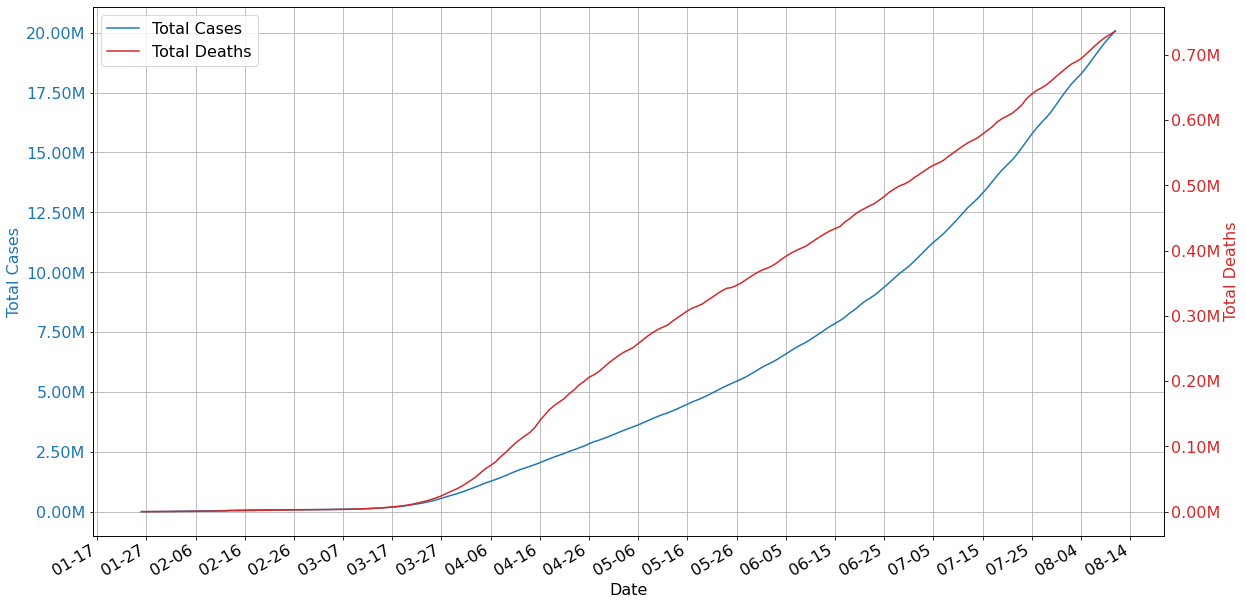

In [13]:
fig, ax1 = plt.subplots(figsize=(19.20,10.80))

color = 'tab:blue'
ax1.plot(dfWorld.date, dfWorld.total_cases, color=color, label='Total Cases')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(dfWorld.date, dfWorld.total_deaths, color=color, label = 'Total Deaths')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Deaths', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
plt.gcf().autofmt_xdate()

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

plt.show()

### Daily deaths [WORLD]

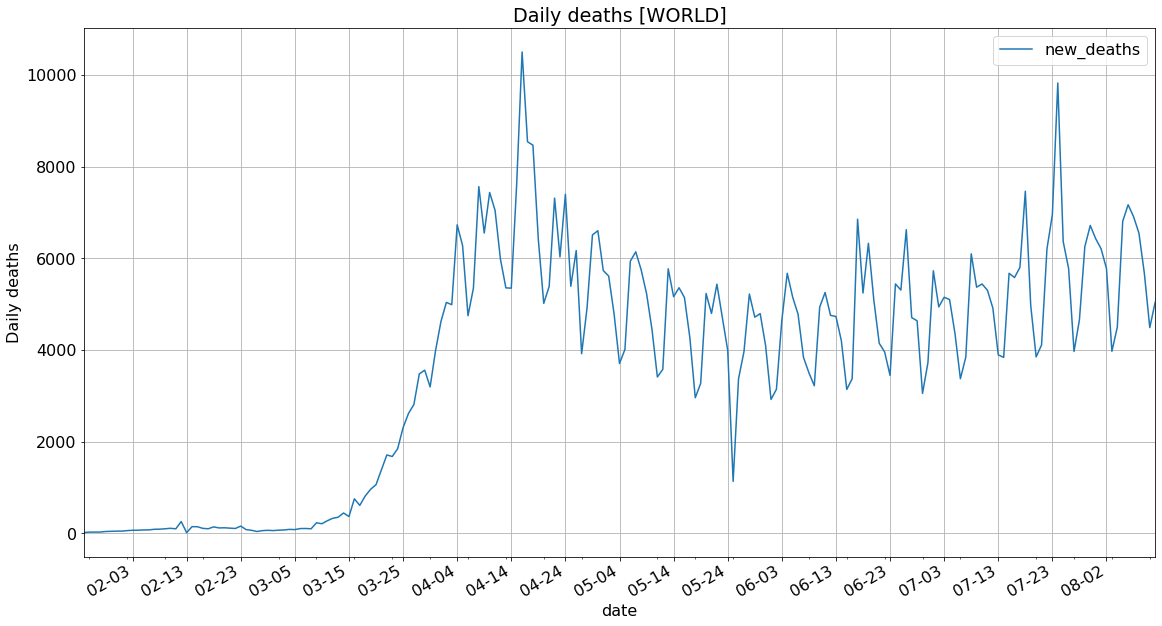

In [14]:
dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Daily deaths')
plt.title('Daily deaths [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

#### Plotly example

### Daily cases [WORLD]

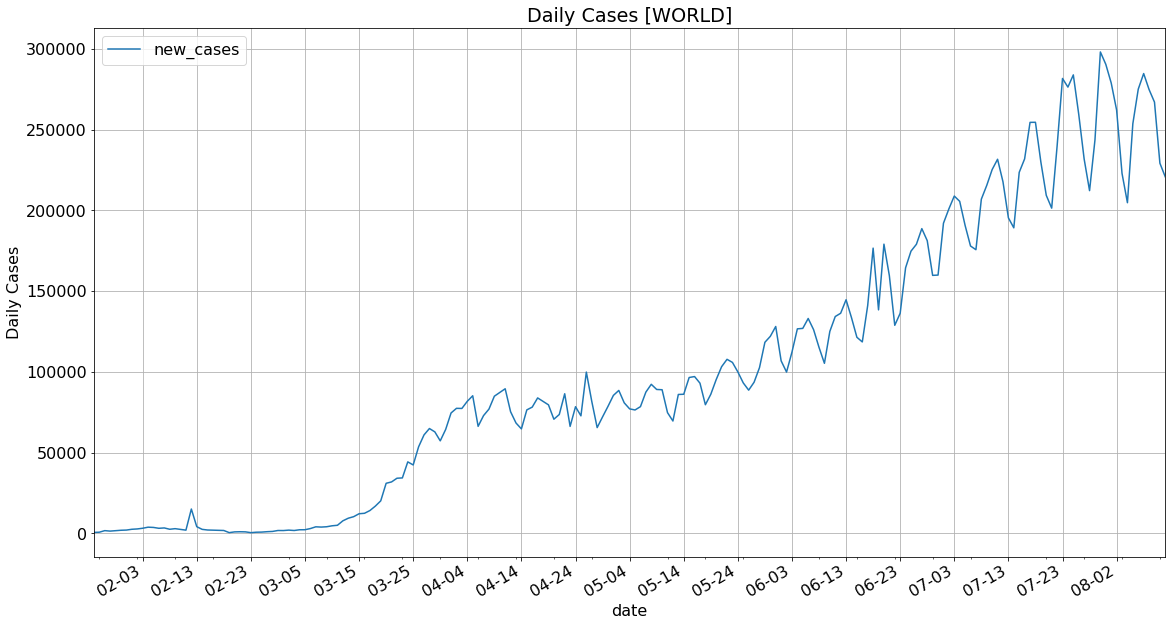

In [15]:
dfWorld.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Daily Cases')
plt.title('Daily Cases [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

## Forecast to daily deaths [WORLD]

#### LSTM Network for Regression

#### Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [16]:
dfPredict = dfWorld.loc[:,['date','total_cases']]
dfPredict = dfPredict[(dfWorld['new_deaths'] > 200)]
dfPredict = dfPredict.sort_values(by='date', ascending=True)
dfPredict['date'] = dfPredict['date'].dt.year.astype('str')+'-'+dfPredict['date'].dt.month.astype('str')+'-'+dfPredict['date'].dt.day.astype('str')
dfPredict.reset_index(drop=True, inplace=True)
dfPredict

,date,total_cases
0,2020-2-13,60329.0000
1,2020-3-9,110984.0000
2,2020-3-10,115746.0000
3,2020-3-11,120832.0000
4,2020-3-12,128670.0000
...,...,...
152,2020-8-7,19083836.0000
153,2020-8-8,19358649.0000
154,2020-8-9,19625682.0000
155,2020-8-10,19854874.0000


In [17]:
dfDeaths = dfPredict.drop(['date'],axis=1)

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dfDeaths)

In [19]:
train_size = int(len(dataset)*0.75)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train), len(test))

117 40


In [20]:
def create_dataset(dataset, lookBack=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookBack-1):
        a = dataset[i:(i+lookBack),0]
        dataX.append(a)
        dataY.append(dataset[i+lookBack,0])
    return np.array(dataX), np.array(dataY)

In [38]:
lookBack = 1
trainX, trainY = create_dataset(train, lookBack)
testX, testY = create_dataset(test, lookBack)

In [39]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [40]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=((1, lookBack))))
model.add(keras.layers.Dense(1))
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [41]:
history = model.fit(trainX, trainY, epochs=50, batch_size=10, validation_split=0.01, verbose=1, shuffle=False)

Epoch 1/50
12/12 [==============================] - 1s 90ms/step - loss: 0.0396 - mse: 0.0396 - val_loss: 0.1753 - val_mse: 0.1753
Epoch 2/50
12/12 [==============================] - 0s 25ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.1241 - val_mse: 0.1241
Epoch 3/50
12/12 [==============================] - 0s 20ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0863 - val_mse: 0.0863
Epoch 4/50
12/12 [==============================] - 0s 18ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 5/50
12/12 [==============================] - 0s 13ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0489 - val_mse: 0.0489
Epoch 6/50
12/12 [==============================] - 0s 13ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 7/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 8/50
12/12 [==============================] - 0s 12ms/step - loss: 0.0114 - m

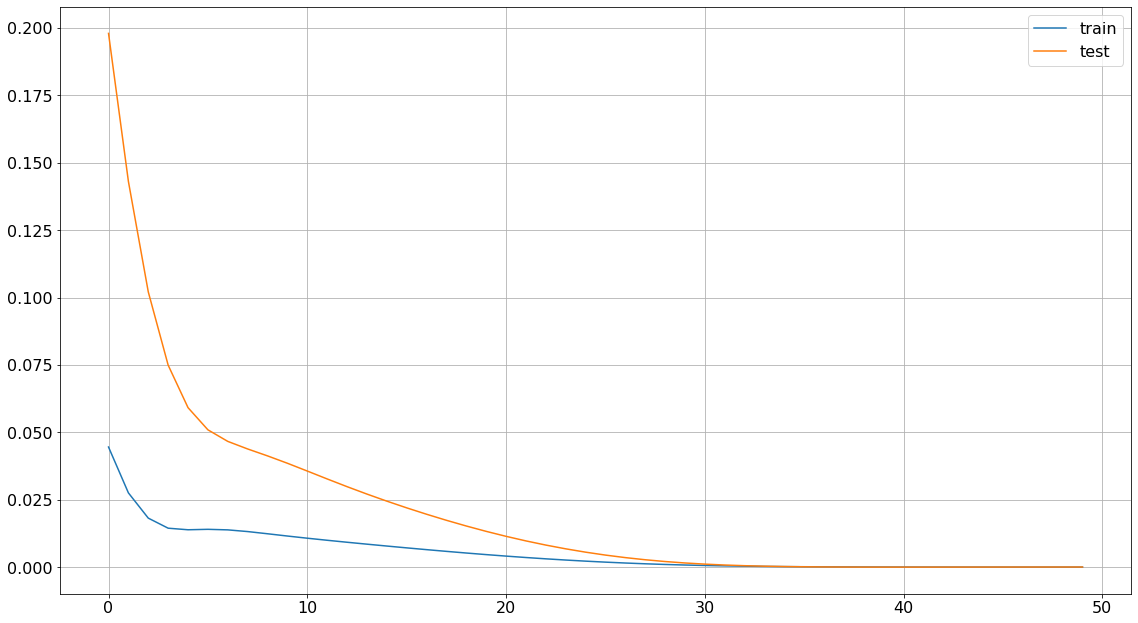

In [25]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.grid()
plt.legend()

In [26]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [27]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [28]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 59871.38 RMSE
Test Score: 717588.75 RMSE


In [29]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookBack:len(trainPredict)+lookBack, :] = trainPredict

In [30]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookBack*2)+1:len(dataset)-1, :] = testPredict

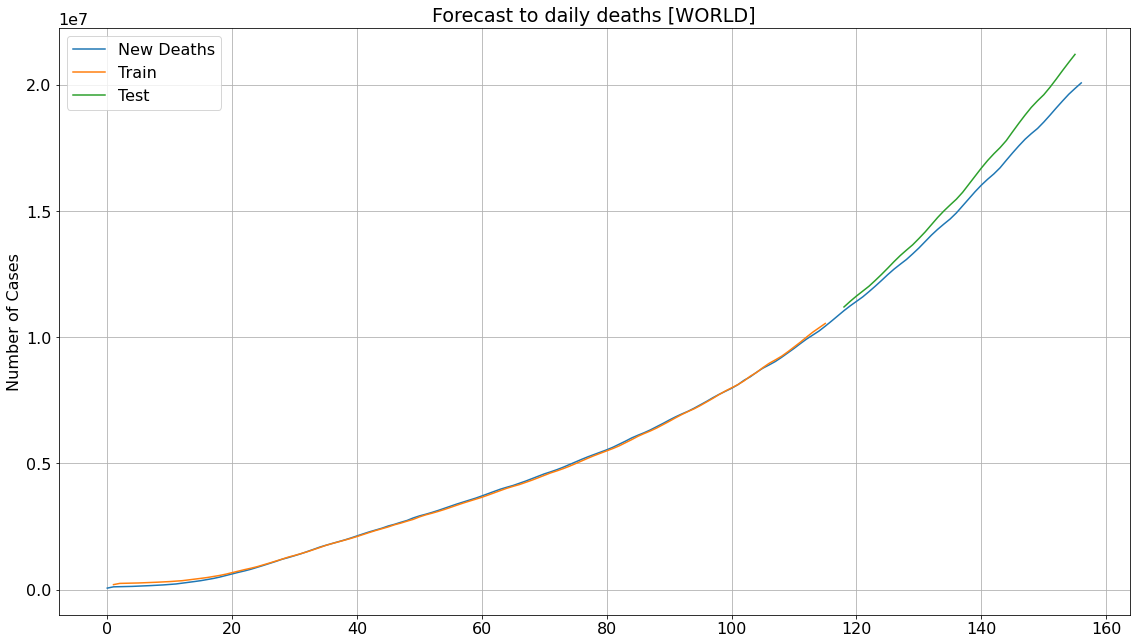

In [31]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.ylabel('Number of Cases')
plt.title('Forecast to daily deaths [WORLD]')

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gca().legend(('New Deaths','Train','Test'))

plt.grid()
plt.show()